# AB Testing

In [1]:
#Trataiento de datos
import pandas as pd
pd.set_option('display.max_columns',None)  # Lim columnas
#-------------------
#Exportación archivos
import sys
sys.path.append('../')
#-------------------
#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
#Funciones personalizadas
from src import sp_abtest as sab

In [2]:
#Estadísticas
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/data_limpio_nonulos.csv')
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
1965,1966,b,2022-01-06,0,fashhion,1109,sneakers,0,0.04,0.00,no_compra,no_compra,south,27.0,m,desktop,24,no_compra,safari,organic,no,151.64
1935,1936,b,2022-01-27,1,fashhion,1528,sneakers,3,0.04,74.42,credit_card,standard,west,63.0,m,mobile,24,yes,safari,paid,yes,25.84
158,159,a,2022-01-27,0,electronics,1127,smartphone,0,0.14,0.00,no_compra,no_compra,west,26.0,f,mobile,7,no_compra,firefox,paid,no,288.39
163,164,b,2022-02-01,0,books,1699,biography,0,0.12,0.00,no_compra,no_compra,central,42.0,f,tablet,7,no_compra,safari,email,no,37.47
1654,1655,a,2022-01-03,0,sports,1022,running_shoes,0,0.00,0.00,no_compra,no_compra,east,42.0,f,tablet,6,no_compra,chrome,paid,no,179.54


In [6]:
#Dos grupos de usuarios, el grupo B mayor pero la diferencia es pequeña.
df['group'].value_counts()/df.shape[0]*100

group
b    50.65
a    49.35
Name: count, dtype: float64

In [7]:
sab.exploracion_df_abtesting(df, 'group')

Los principales estadísticos de las columnas categóricas para el grupo: A son:


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashhion,165
product_name,987,28,jeans,49
payment_method,987,5,no_compra,886
shipping_method,987,4,no_compra,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_compra,886


Los principales estadísticos de las columnas numéricas para el grupo: A son:


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


------------------------------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas para el grupo: B son:


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashhion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_compra,867
shipping_method,1013,4,no_compra,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_compra,867


Los principales estadísticos de las columnas numéricas para el grupo: B son:


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


------------------------------------------------------------------------------------------------


In [8]:
df.sample(4)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
600,601,a,2022-01-04,0,books,1344,mystery,0,0.01,0.0,no_compra,no_compra,south,41.0,m,tablet,30,no_compra,safari,social,no,29.60
630,631,b,2022-01-13,0,toys,1229,doll,0,0.09,0.0,no_compra,no_compra,central,25.0,f,desktop,6,no_compra,edge,email,no,73.37
299,300,a,2022-03-25,0,sports,1891,football,0,0.08,0.0,no_compra,no_compra,west,34.0,m,desktop,13,no_compra,safari,social,no,284.94
1733,1734,a,2022-02-01,0,electronics,1730,camera,0,0.27,0.0,no_compra,no_compra,central,51.0,m,mobile,16,no_compra,safari,social,no,443.05


# Métricas a estudiar
- conversión
- total_value
- session_duration
- quantity

Text(0.5, 1.0, 'Cantidad')

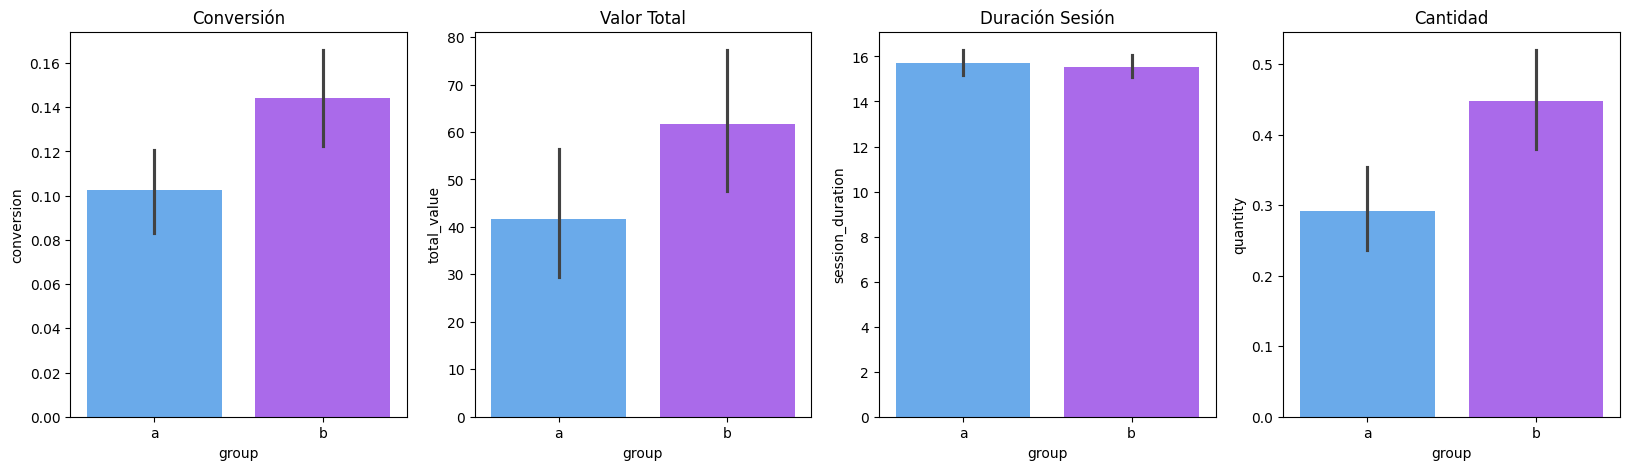

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
sns.barplot(x='group', y='conversion', data=df, ax=axes[0], hue='group', palette='cool')
axes[0].set_title('Conversión')
sns.barplot(x='group', y='total_value', data=df, ax=axes[1], hue='group', palette='cool')
axes[1].set_title('Valor Total')
sns.barplot(x='group', y='session_duration', data=df, ax=axes[2], hue='group', palette='cool')
axes[2].set_title('Duración Sesión')
sns.barplot(x='group', y='quantity', data=df, ax=axes[3], hue='group', palette='cool')
axes[3].set_title('Cantidad')

In [10]:
metricas = ['conversion', 'total_value', 'session_duration', 'quantity']

In [17]:
#Test de normalidad
def normalidad (df, lista_metricas):
    for metrica in lista_metricas:
        statistic, p_value = stats.shapiro(df[metrica])

        if p_value > 0.05:
            print(f'Para la columna {metrica.upper()} los datos SI siguen una distribución normal')
        else:
            print(f'Para la columna {metrica.upper()} los datos NO siguen una distribución normal')

In [18]:
normalidad(df, metricas)

Para la columna CONVERSION los datos NO siguen una distribución normal
Para la columna TOTAL_VALUE los datos NO siguen una distribución normal
Para la columna SESSION_DURATION los datos NO siguen una distribución normal
Para la columna QUANTITY los datos NO siguen una distribución normal


desde minuto 38